# **Google Play Store Apps Analysis**

This notebook includes the procedure of cleaning data with pandas methods on google play store apps data obtained from [Kaggle](https://www.kaggle.com/datasets/lava18/google-play-store-apps) and making a descriptive analysis of it with seaborn methods.

## 1) Import Libraries

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as ms
from IPython.display import display_html
import os, re

## 2) Data Acquisition

Google play store apps data is acquired from [Kaggle](https://www.kaggle.com/datasets/lava18/google-play-store-apps) as two csv files *googleplaystore.csv* for app features and *googleplaystore_user_reviews.csv* for app reviews. We will load these datasets into two dataframes ***df_feature*** and ***df_review***.

#### Feature Data:

In [2]:
# load the feature data
# df_feature = pd.read_csv('data/googleplaystore.csv', na_values = ['NaN', 'Varies with device'])
df_feature = pd.read_csv('googleplaystore.csv')

# sample feature data
df_feature.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
# observe the new dataframe details
df_feature.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
# missing values
df_feature.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

#### Review Data:

In [3]:
# load the review data
# df_review = pd.read_csv('data/googleplaystore_user_reviews.csv', na_values = ['nan'])
df_review=pd.read_csv('googleplaystore_user_reviews.csv')

# sample review data
df_review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [7]:
# observe the new dataframe details
df_review.info(verbose=True)

# Observations (Gaia): the last three column are very consistent. Interesting to notice that there are 5 translated reviews
# less than the sentiment columns values, and yet still those 5 non-existent reviews have been evaluated. How is it possible?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [8]:
# missing values
df_review.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [ ]:
# THIS CODE CAN BE USED AFTER DATA CLEANING, DO NOT RUN FOR NOW

# save raw data for emergency uses
if not os.path.exists('data'):
    os.mkdir('data')
df_feature.to_csv(os.path.join('data', 'raw_feature.csv'), encoding='utf-8-sig')
df_review.to_csv(os.path.join('data', 'raw_review.csv'), encoding='utf-8-sig')

## 3) Data Conversion and Feature Split
We rename columns as code friendly for easier access. We will convert the 'object' type columns into str or numeric to perform imputation later by splitting the columns with multiple meaningful contents into separate columns.

In [4]:
# rename columns to remove spaces
df_feature.columns = df_feature.columns.str.lower().str.replace(' ','_')
df_review.columns = df_review.columns.str.lower().str.replace(' ','_')

# show new column names
print("Feature:", end=" ")
print(*df_feature.columns.values, sep = ", ", end="\n")
print("Review:", end=" ")
print(*df_review.columns.values, sep = ", ", end="\n")

Feature: app, category, rating, reviews, size, installs, type, price, content_rating, genres, last_updated, current_ver, android_ver
Review: app, translated_review, sentiment, sentiment_polarity, sentiment_subjectivity


### 3.1) Feature Data

#### Category: (Gaia)

In [ ]:
# no need for modification - it's already str

#### Rating: (Gaia)

In [ ]:
# no need for modification - it's already a float

#### Reviews: (Gaia)

In [12]:
df_feature.reviews = df_feature.reviews.apply(pd.to_numeric, errors='coerce')
df_feature.reviews.info()

<class 'pandas.core.series.Series'>
RangeIndex: 10841 entries, 0 to 10840
Series name: reviews
Non-Null Count  Dtype  
--------------  -----  
10840 non-null  float64
dtypes: float64(1)
memory usage: 84.8 KB


#### Size: (Gaia)

In [24]:
type(df_feature.size)
#df_feature.size = df_feature.size.apply(pd.to_numeric, errors='coerce')

numpy.int64

#### Installs: (Gaia)

In [18]:
# replace plus sign and comma with empty to remove it
df_feature.installs = df_feature.installs.replace(('\+|,|'), '', regex=True) #now it's still a string
df_feature.installs= df_feature.installs.astype(int)
# recheck the previous samples
#df_feature.loc[474:478]
df_feature.installs.info()

ValueError: invalid literal for int() with base 10: 'Free'

#### Type: (Gaia)

In [ ]:
# no need for modification - it's already a str

#### Price: (Beste)
All price information include a numeric value and the currency sign. Thus, we will remove the currency sign and set the price information as float.

#### Content Rating: (Beste)

#### Genres: (Beste)
Since the genre includes one or more categories, we will split the column to be able to use these categorical tags. 

#### Last Updated: (Beste)

#### Current Version: (Beste)

#### Android Version: (Beste)

### 3.2) Review Data

#### Translated Review: (Gaia)

In [ ]:
#no need for modification

#### Sentiment: (Gaia)

In [ ]:
#no need for modification

#### Sentiment Polarity: (Beste)

#### Sentiment Subjectivity: (Beste)

In [ ]:
# ONLY CONVERSION OF OBJECT TO NUMERIC OR STR, NO SPLIT OR DROP HERE
# numeric conversion of numeric data, reassign nonnumeric values as NaN
''' an example of numeric column conversion while keeping nonnumeric as NaN with coerce 
num_cols = ["eps","user"]
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')'''

# CODE HERE

# string conversion of text data or numeric data with additional text (astype str)

# CODE HERE

## 4) Data Imputation
We check the initial empty cell rates per column within the data frame for further operations.

<AxesSubplot:>

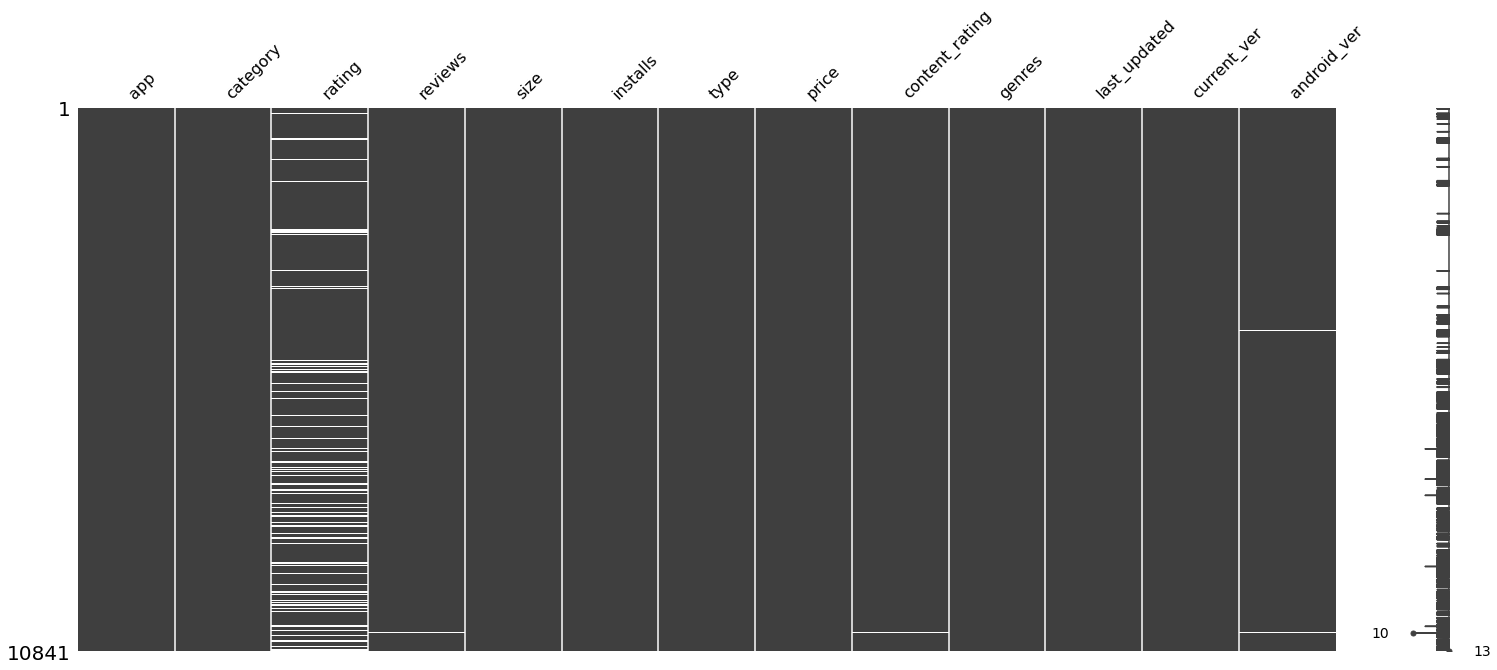

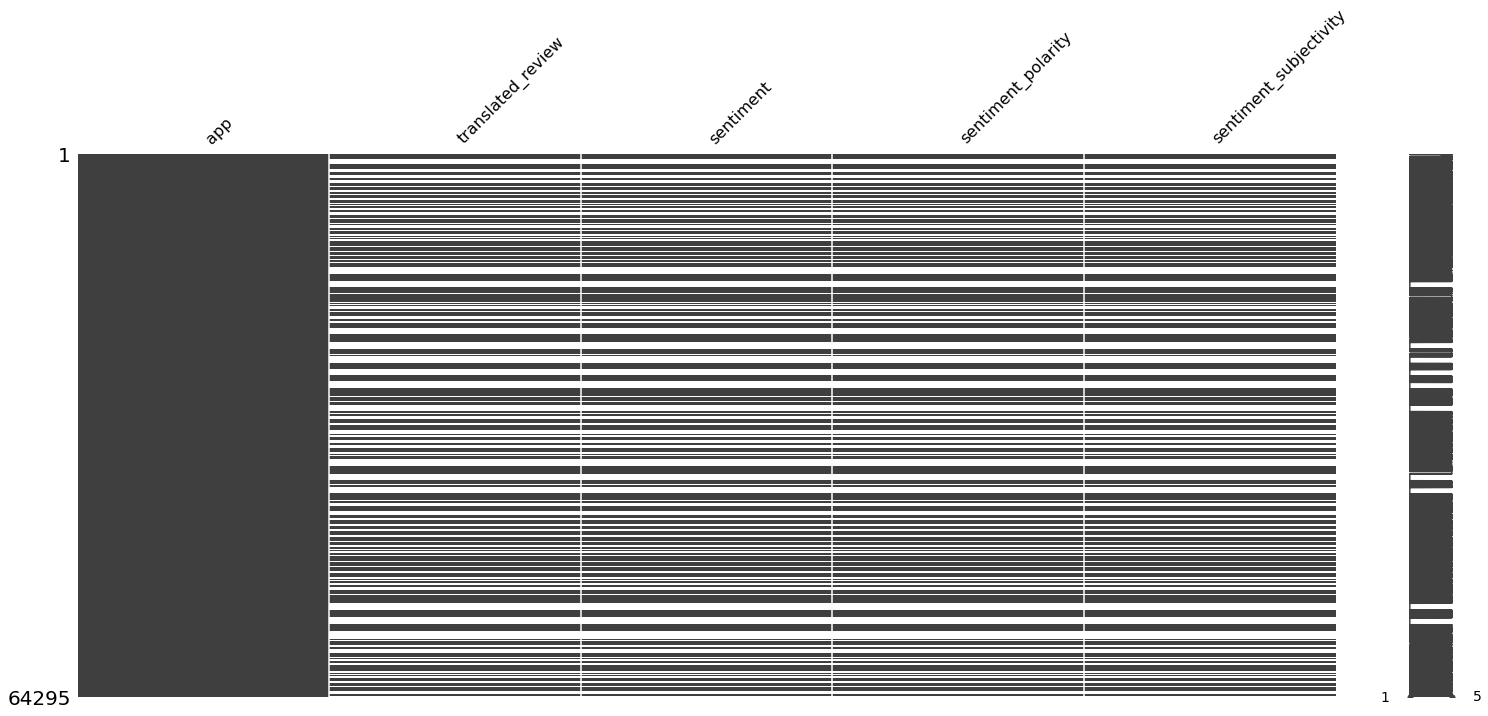

In [19]:
# using missingno library to review missing values

ms.matrix(df_feature)
ms.matrix(df_review)

In [13]:
# Additional plotting to see missing value percentage by columns

# TODO: parametrize the text alignment and graph colors
def findEmpty(df):
    percentages = []
    labels = []
    str_ = ""

    # iterate over data
    for col in df.columns:
        # percentage of null cells in the whole column
        p_missing = np.mean(df[col].isnull())
        # sum of null cells in the whole column
        missing = df[col].isnull().sum()
        percentages.append(p_missing*100)
        labels.append(col)
        # generate a string to print out results with numbers
        if(missing):
            str_ += "\n" + col + " - " + str(missing) + " / " + str(len(df[col]))
    return percentages, labels, str_

def plotEmpty(names, *dfs):
    # common plot calls
    text_kwargs = dict(ha='left', va='top', fontsize=12)
    plt.figure(num=None, figsize=(len(dfs)*6, 4))
    
    # color list to change color on each graph
    colors = ['skyblue','teal','pink','turquoise','maroon','navyblue']
    
    for idx, df in enumerate(dfs):
        percentages, labels, str_ = findEmpty(df)
        
        # plot results with bar plot
        ticks = list(range(1, len(labels)+1))
        plt.subplot(1, len(dfs), idx+1)
        plt.bar(ticks, percentages, color=colors[idx])
        plt.xticks(ticks, labels, rotation=75)
        plt.ylim(0, 120)
        plt.text(0.5, 125, str_, **text_kwargs)
        for index, value in enumerate(percentages):
            plt.text(index+1, value, str(int(value)), ha='center', va='bottom')
        plt.ylabel('Percentages')
        plt.title(names[idx]+' Empty Cell Percentages')
        
    plt.show()

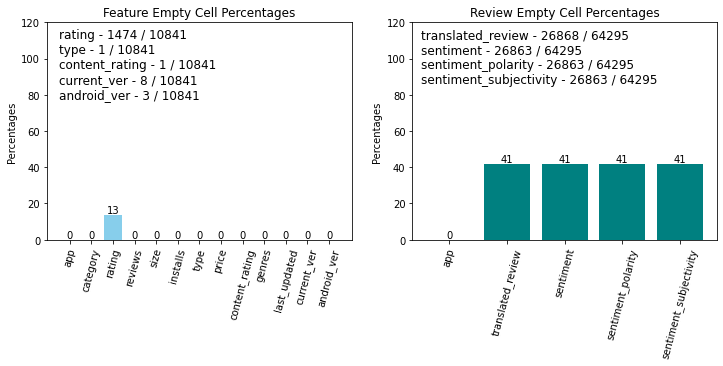

In [14]:
# plot empty columns of datasets
plotEmpty(["Feature", "Review"], df_feature, df_review)

We may now fill NaN values with column specific solutions. 

### 4.1) Feature Data

In [15]:
# check some sample row locations for empty cells to view: np.where(df_feature.isnull())
np.unique(np.where(df_feature.isnull())[0])

array([   15,    23,   113, ..., 10831, 10835, 10838], dtype=int64)

In [16]:
# print some interval with empties to check the imputation results later
df_feature.loc[10837:10840]

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


#### Category: (Gaia)

In [23]:
# fill missing values with mean/median values of the columns or constant values
#'''sample usage (median-numeric) : df_boxof = df_boxof.fillna(df_boxof.median(numeric_only=True))'''
#'''sample usage (mod-categorical) : df_anidb.aired.fillna(df_anidb.aired.value_counts().idxmax(), inplace=True)'''
# recheck the previous samples


df_feature.category=df_feature.category.fillna(df_feature.category.value_counts().idxmax(), inplace=True)
df_feature.loc[10837:10840] 

ValueError: attempt to get argmax of an empty sequence

#### Rating: (Gaia)

In [24]:
# fill missing values

# CODE HERE
df_feature.rating = df_feature.rating.fillna(df_feature.rating.mean())

# recheck the previous samples
#df_feature.rating.isnull().sum()
df_feature.loc[10837:10840]     #it works!


,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
10837,Fr. Mike Schmitz Audio Teachings,None,5.000000,4.0,3.6M,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,None,4.193338,3.0,9.5M,1000,Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,None,4.500000,114.0,Varies with device,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,None,4.500000,398307.0,19M,10000000,Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


#### Reviews: (Gaia)

In [25]:
# fill missing values

df_feature.reviews = df_feature.reviews.fillna(df_feature.rating.mean())

# recheck the previous samples

df_feature.loc[10837:10840] 

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
10837,Fr. Mike Schmitz Audio Teachings,None,5.000000,4.0,3.6M,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,None,4.193338,3.0,9.5M,1000,Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,None,4.500000,114.0,Varies with device,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,None,4.500000,398307.0,19M,10000000,Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


#### Size: (Gaia)

In [26]:
# fill missing values

df_feature["size"] = df_feature["size"].fillna(df_feature.size.mean()) 

# recheck the previous samples

df_feature.loc[10837:10840] 

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
10837,Fr. Mike Schmitz Audio Teachings,None,5.000000,4.0,3.6M,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,None,4.193338,3.0,9.5M,1000,Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,None,4.500000,114.0,Varies with device,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,None,4.500000,398307.0,19M,10000000,Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


#### Installs: (Gaia)

In [27]:
# fill missing values
df_feature.installs = df_feature.installs.fillna(df_feature.installs.mean())

# recheck the previous samples

# CODE HERE
type(df_feature.installs[5])

TypeError: Could not convert 10000500000500000050000000100000500005000010000001000000100001000000100000010000000100000100000500050000010000500000010000000100000100000500000100000500001000050000010000010000100000100000500001000001000001000010000050000050000001000050000010000100000100000001000001000010000000100000100000100000100000100000010000010000001000001000001000005000010000010000010000010000100000100000010000010000010000500005000000100000500000050000005000001000000010000050000050000100000100000010000010000005000010000005000001000001000000100000010000010000010000001000001000001000000100000010000001000000500000500000100000500000100000010000050000010000005000001000001000000500001000000100001000000100000100005000010000010000100001000010000000500000100000050000100001000000500005000005000001000001000050001000010000100000500010000010000100001000000500001000010000000050000100000100000001000000001000000010000000100000001000001000000100000005000001000000100000000050000001000001000000050000010000000100000010000005000001000000500000100005000000100000500000050000010000005000005000001000000500000010000000100000100000100000500005000001000000050000100000010000001000000500000100000100000001000000050000000100000005000000100000050000000500000010000000010000001000000500000100000005000000100000050000000100000001000000100000005000000500000050000005000000100000100000010000001000000100000005000000100000050000001000001000000010000001000000100000500000010000001000005000000050000001000001000000500000010000001000000010000000100000010000010000010000000500005000000500000050000001000001000001000000500000100000500000500000100000010000001000000100000100000100000010000001000000010000000100000100000500000050000100000010000005000001000000010000000500005000000500000050000001000001000001000000500000100000500000500000100000010000001000000100000100000100000010000001000000500000010000001000000010000000100000010000010000050000000100000000500000010000100000010000000500000100000050000050000500005000010000001000010000100001000010000100000500000010000010000001000001000000100000010000001000000100000500000050000100000100001000050005000001000000500010005000000100005000010000001000001000000000100000000010000000100000000010000000010000000001000000000500000000500000010000000010000000010000000050000000050000000500000050000001000000001000000010000000100000001000000010000000010000001000000100000005000000100000001000000010000000050000001000000001000000001000000010000001000000001000000005000000001000000010000001000001000000010000000100000005000000005000000500000010000000001000000000500000000100000005000000001000000000100000005000000500000001000000001000000000100000000100000000100000001000000001000000001000000100000001000000010000000100000001000000050000000010000000100000010000000010000000010000001000000100000001000000000100000000500000001000000010000000010000001000000005000000010000000050000000010000001000000100000010000000500000500000100000100000001000000050000005000000001000000100000050000001000000010000001000000010000001000000100000001000000050000001000000050000001000000100000050000001000000100000000100000010000000001000000005000000100000001000000100000010000001000000050000000100005000000100000050000010000000005000000005000000050000000010000000001000000001000000500000010000000100000005000000001000000001000010005010010010010000000100000001000000010000050000050000001000000100000001000000100000005000000500000010000050000010000001000000100001000000100000010000010000000100000010000050000050005000005000000100000010000010000001000000100000100000500000500000500000100000500000500000100000500001000000100000010000010000010000010000100000100000010000010000000500000100000100000050000500000050000010000010000050000010000000100000010000050000010000010000005000000500000500000100000001000010000000100000100000100000050000010000010000001000001000000100000005000050000010000001000001000050000010000001000001000010000100001000000010000005000005000005000001000000100000500000100001000001000005000001000001000000100001000010000001000000010000100000100001000000100000050000100005000005000000100000010005000100050050001000010010000100010010001000100010050050050001001005050005050010500500100100010100105005001010010010101005010010010500100050050110100015010010000500100010510100100000010000010000050001000100000050001000500000050010010000010000005000001000100001005000001000010000100010005005000100001000050000100001000005000100001000100005000000100000100000050001000000001000000010000050000001000000010000050000001000000500000500000100000010000005000000100000050000050000005000001000000100000001000000010000005000000500001000000100000010000001000000100000050000010000005000000100000050000050000010000010000000100000500000010000000500000010000000100000001000000500000010000005000000500000010000000100000001000000100000010000001000000100005000010000001000000100000010000001000000100000010000001000000100000010000001000000100000100000010000010000100005000050000010000010000010000010000100000100000500005000010000010000050000001000000010000000010000000500000010000001000000100000050000001000000010000001000000010000001000000100000001000000500000010000000050000005000000100000050000010000001000000100000001000000010000000100000050000010000001000000500001000000100000100000100000100000100000001000000010000010000100000001000000010000000100000000500000500000050000005000005000000100000001000000050000010000000100000010000001000000100000010000001000001000000010000000500000010000000100000005000000100000010000010000001000100050000010000010000000010000001000000100000005000000010000000500000050000001000000050000001000000000100000000500000010000005000000500000010000001000000100000001000000005000000100000001000000100000005000000050000001000000010000001000000010000001000000050000000100000010000000050000000100000050000005000000010000000010000001000001000000100000010000000100000001000001000001000000100000000100000000500000100000100000100000010000001000000010000001000000010000000100000005000010000001000000010000005000000100000050000001000000100000001000000010000001000000100000010000001000000100000000100000000100000001000000010000000100000001000000010000000100000005000000500000050000050000001000000100000001000000010000001000000500000100000010000001000000100000010000000100000010000000100000001000000100000000100000001000000010000000100000001000000010000000100000005000005000000100000001000000100000010000000500000010000000100000010000000100000100000010000001000000100000010000001000000100000010000000100000010000001000010000000100000100000500000010000000100000001000001000001000000100000010000001000000100000001000001000000010000000100000500000050000050000500000010000001000010000001000001000010000001000001000001000005000010001000000100005005000010010010000010000050010000010010000010010005000100000100010000010010005000050001000001001000100010050010000000100000050000005000000500000010000000500000500000010000000100000010000001000000050000001000000100000010000000100000050000001000000100000050000001000000500000010000001000000100000001000000010000005000000010000000100000010000001000000100000001000000100000000500000010000005000000100000010000000100001000000100000100000100000100000010000001000000001000000100000050000001000005000001000000100000500000100000010000001000001000001000000100000050000100000010000010000000100000100000050000001000000100000100000010000010000001000000500001000000500000050000010000001000000100000050000001000000100000500000100000010000001000000500000100000050000005000001000001000000100000050000005000000500001000000500000010000010000005000001000000500000100000500000001000000100000100000100000010000005000000100000000500001000000010000500000010000000100000001000000500000010000001000000010000000100000010000000500001000000010000001000010000010000001000000010000005000001000000050000050000100000010000001000000500000500000010000005000000100000010000000100000100000005000000500000010000001000000050000001000000100000010000001000000100000100000100000050000500000500000100000100000010000001000001000005000000500000100000100000010000500005000000100005000010000001000000100000001000000100000010000005000000100000001000000050000500000010000010000001000000010000001000000100000100000001000001000000500000010000000100000050000005000000100000001000000010000000500000500000010000001000000010000000100000001000000010000000100000001000000100000001000000100000500000100000500000500000010000001000000050000100000005000001000001000000100000005000001000000050000001000000500000001000005000000100000001000000100000100000001000000500000100000100000001000000500000010000005000001000000100000010000001000000010000000500000010000005000000100000005000001000000010000000100000050000001000000100000001000000010000001000000050000001000000500000010000000100000001000000500000010000010000001000001000000500000500000100000100000010000500000100000100000100000050000001000005000000500000100000001000005000000100000100000010000001000000100000050000001000000100000010000005000001000000050000010000001000000001000000050000000500000050000005000001000000100000010000001000000050000500001000000100000001000000500000050000001000000100000050000005000000100000001000000050000001000000010000005000000010000000100000001000000010000000100000001000000500000100000010000001000001000000010000001000005000050000010000001000005000000010000000100000050000050000001000000100000010000000100000100000100000010000050000001000000500005000001000005000000010000000500000100000010000010000005000001000005000001000000100000050000050000010000010000005000000500000500000050000001000000500000010000005000001000000050000001000000010000010000001000000050000001000000100000010000001000000010000100000005000001000001000000100000010000001000000100000010000050000001000000100000010000005000500000010000100000500000100000010000010000001000001000001000000500000500000500000050000050001000001000050000100000100001000001000000100000500000100000050000100000001000000500000100000010000005000005000001000000100000010000000100000001000000050000010000005000000100000010000000500005000010000100000100010000010000100000500000050000100000001000100000500001000005000010000010000500005000010000010000010000000100001000001000010000500050000050000001000001000000100001000000100050000010000001000001000000100001000000500000500000100000500005000005000001000000100000500000010000000100000100000005000000100000050000001000000100000001000000100000050000001000000050000050000001000000010000001000000100000005000000100000010000000500000001000000500000500000100000050000001000000100000010000010000001000000100000001000000100000010000000500000100000001000000100000010000010000010000000500000100000010000001000000100000100000100000010000001000000010000050000050000010000100000500000010000005000005000001000010000001000001000000050000050000010000100000010000010000000100000500005000100000100000010000050000100000010000010000005000000500000500000100000050000010000001000001000000100000100000000100000000050000000010000000100000005000000010000000010000000050000000050000000010000000050000001000000001000000001000000001000000001000000100000000500000005000000100000000100000010000000050000000500000001000000050000000100000000100000000100000001000000010000000100000000500000010000000500000001000000005000000010000000100000001000000010000000010000000010000000100000000100000000100000000100000000010000000050000000010000000010000000050000000010000000010000000010000000100000000100000000100000005000000010000000100000001000000010000000010000000100000000500000050000000100000000500000000100000000500000001000000010000000010000000100000050000000010000000050000001000000010000000010000001000000001000000001000000001000000010000000010000000010000000100000000100000000100000000100000005000000010000001000000001000000001000000000500000000100000005000000050000000100000000100000000100000000100000000500000000500000005000000050000000100000000100000000100000001000000050000000100000001000000100000005000000500000010000000010000001000000100000001000000050000000500000100000010000000050000005000000100000005000000050000000100000001000000010000000500000001000000010000000050000005000000010000000100000010000000100000010000000100000005000000100000001000000010000005000000500000050000001000000050000005000000100000050000001000000010000001000000500000010000001000000010000000100000001000000100000050000001000000050000001000000010000010000001000000100000100000100000100000100000100000100000100000100000100000500000010000000050000000010000000010000000010000000100000005000000010000000500000010000000500000005000000100000001000000050000001000000010000000500000100000050000005000000050000001000000050000010000005000000050000001000000500000000100000000100000000100000000010000000010000001000000010000000500000001000000001000000001000000001000000001000000050000001000000500000000500000000100000000100000001000000010000000010000000010000000010000000050000000100000001000000010000000010000000500000001000000500000001000000001000000010000000100000000100000000500000005000000001000000001000000001000000050000001000000010000000010000000050000000100000000010000000010000000050000000010000000050000000100000000100000001000000005000000050000000100000005000000050000000100000001000000001000000010000000500000050000000100000005000000050000000100000001000000010000000100000001000001000000010000000100000000100000010000000010000001000000500000010000000100000001000000010000000100000000500000050000001000000010000050000000500000050000000100000005000000001000000005000000100000000100000000100000001000000010000000500000010000000100000000100000000500000005000000100000001000000001000000010000000100000000500000001000000001000000100000000100000001000000001000000010000000050000001000000010000005000000010000000100000005000000050000000500000010000000100000001000000005000000100000001000000001000000005000000050000000100000000500000001000000050000000100000001000000001000000500000050000001000000100000050000001000000100000500000050000000100000050000010000000500000500000010000005000001000000050000010000005000000010000000100000010000000500000010000005000000500000100000001000000100000010000000100000001000000001000000010000000100000010000000100000010000000010000000100000500000010000010000500050000001000001000000100000050000001000000100000010000001000000500000050000050000010000001000000500001000000100000010000000100000100000500000500000500010005001000000001000000010000000010000000100000010000000100000100000001000000500000050000010000000100000010000001000005000050000000500000100000005000001000000100000001000000100000500000010000001000000100000001000000100000001000000050000000100000005000000100000100000005000000100000001000000500000001000000100000001000000100000005000000100000001000000010000000500000010000005000000010000001000000050000050000050000010000010000010000001000010000000500000100000500000100001000010001000000050000001000000100000010000001000001000005000050000010000050000001000100000100050000100010010010005000500010001000010000500010000000100000010000001000000100000100000100000500000010000010001000010000500001000000010000001000000100000010000010000010000050000001000001000100001000050000100000000100000005000000010000000500000010000000500000010000000500000050000001000000005000000100000001000000050000001000000100000001000000050000005000000010000000500000010000001000000050000001000000100000010000001000000010000001000000500000050000001000000010000000100000001000000100000100001000010000100001000050005000100000500001000100005000010001000100001000100010001005000500050010001000010001001000500500010005001000500010000100010000100100050001000010001000100500001000100050005000100010000501000100001000100050050010005000100000010000001000000100000010000005000005000050000001000000100000010000050000010000100000050000050000050000005000050000010000005000001000001000001000001000005000001000001000000100000050000100000010000010000010000010000010000005000010000010000010005000001000000100001000000100010000050000010000050000500000100001000000100000500010000010000010000050001000001000001000005000010001000001000000500010000100005000010000010000100000100000500001000010000500001000010000100005000010000010005000010005000100010001000100000100000100000100005000100001000010000500010001000100050001000010001000050001001000100001000050001005000050001000100001001000100000150101500100500100050100100101010010010100501010010001010010500501001051050101501001010510101100500051010105501105051001001051001010010551050000010000010000001000000100001000100005000050000100010001000005010000010000500500010000500001000001000100000100000500010000001000050010005000100001050000010010000100001000001005000100001000050000100010001001000500005000010010005000010000100000100010000500100000500010000001000000000100000000050000000010000000100000000100000050000000010000010000000010000000100000000010000001000000100000050000001000001000000500000050000001000000500000010000000500000010000005000005000000500001000000010000005000000100000010000001000000010000000100000001000000010000000100000010000000010000001000000050000005000000100000001000000001000000010000000100000001000000005000000010000000500000001000000050000001000000010000000050000005000001000005000000001000000000100000050000010000000100000005000005000000001000000000100000000500000050000000100000010000000500000005000000050000001000000100000000100000001000000001000000010000000100000010000000050000005000000050000000100000001000000010000050000005000000500000001000000010000000100000001000005000000500000005000000010000000100000005000000010000000010000000100000001000000010000000100000050000001000000010000000010000000100000001000000050000001000000001000000010000000050000000100000000500000005000000010000001000000050000005000000100000010000001000000050000000100000001000000010000005000000100000001000000100000001000000100000005000000010000000100000001000000010000000100000001000000010000000100000005000000010000000100000001000000010000000100000000500000010000005000000100000010000001000000100000010000000500000500000100000010000000100000001000000001000000100000001000000050000000500000010000000100000010000000100000005000010000001000000100000001000000010000005000000100000010000001000000050000000100000010000000100000500000100000010000000010000000500000500000500000050000010000010000000100000010000000100000010000000010000000500000010000000500000010000001000000010000000050000001000000100000050000005000001000000010000000010000000100000010000001000000010000000100000001000000010000000100000010000000100000000500000050000050000010000005000000500000010000001000000050000000100000000500000100000010000000100000100000010000000010000001000001000000100000005000000100000000500000010000005000001000000010000005000000100000050000050000100000010000001000000000500000005000000100000001000000010000000500000001000000100000000100000010000050000001000000500000010000001000000500000050000000500000100000001000000050000000500000100000010000001000000001000000100000000500000001000000010000001000000500000010000000100000010000005000000100000001000000010000000010000000100000000100000001000000500000010000000005000000100000001000000050000005000000010000000010000000500000001000000001000000050000001000000001000000010000000010000001000000005000000010000001000000001000000100000010000001000000500000010000000010000000100000010000000500000010000001000000000500000010000000100000005000000500000010000000100000001000000050000001000000100000001000000010000000010000000100000001000000010000005000000050000001000000001000000010000010000000100000000100000000500000001000000001000000100000500000005000000050000000100000005000000100000001000000010000000010000000010000005000000100000001000000010000001000000050000000500000005000000050000000100000001000000010000000050000000100000000100000000100000000100000005000000010000000010000000010000000010000000050000001000000050000000100000000100000010000000100000010000000500000050000001000000010000000010000000100000001000001000000050000005000000010000000100000005000001000000010000005000000500000050000001000000010000001000000050000005000000500000050000005000000100000010000001000000050000001000000010000000500000010000010000001000000100000050000001000005000005000005000001000000100000001000005000000100000100000500000100000001000001000000500000500000010000050000001000000050000000500000050000001000000050000001000000010000001000000050000005000000500000010000000100000100000010000001000001000000100000100000010000001000005000050000010000010000001000001000001000000500001000000100000050000001000000100000050000001000000100000010000000100000050000001000050000100000100000010000000500000010000010000001000010000000500000050000001000000050000005000001000000100000005000000100000001000005000000100000005000000500000005000005000005000001000010000005000000500000010000000100000005000000010000000100000100000005000001000000500000010000005000000100000010000000100000050000005000000100000010000001000000100000001000000050000000500000010000005000001000000100000001000000050000010000000100000000100000050000001000000001000000010000000005000000050000005000000100000000100000005000000100000005000000010000000100000000010000000100000001000000010000001000000100000050000005000001000000001000005000000500000010000001000000100000001000000010000000100000005000000500000010000000100000001000000500000005000000100000050000001000000100000000100000050000001000000500000010000000100000001000000010000001000001000100000500000010000000100000000100000010000005000000500000010000000100000010000010000005000000500000010000001000000500000010000005000000100000010000000500000050000001000000100000010000000100000010000000500000010000001000000100000010000005000000100000500000001000000050000001000000010000001000000010000001000000100000001000000005000000100000010000000010000000500000010000000100000010000010000001000000050000001000000000100000001000000500000010000001000000500000500000100000010000000001000000010000000005000000001000000050000000500000001000000001000000100000001000000001000000001000000001000000050000000500000001000000010000000500000010000000100000010000000100000500000000100000001000000010000005000000100000001000000001000000010000000100000005000000001000000001000000010000000100000001000000010000000100000000100000001000000500000100000001000000050000100000100000100000001000000010000005000000100000010000000500000001000000010000000010000000500000001000000050000005000000010000000500000050000005000000050000001000000050000005000000100000010000001000000100000010000000100000001000000500000010000001000001000000100000500000005000000100000010000005000000010000000100000010000005000000500000010000000500000000100000005000000010000000010000000100000001000000100000000100000001000000100000010000000500000010000001000000100000001000000010000000010000000100000010000001000000010000000010000000100000001000000500000001000000100000000500000010000050000005000000100000010000000050000010000001000000100000050000000100000010000000100000001000000010000000100000001000000010000000100000000100000001000000050000010000000100000001000000100000050000000100000010000000100000000500000100000010000001000000050000005000000500000500000500000010000050000010000010000000010000000500000005000000100000010000001000000100000010000005000000100001000000050000001000000050000001000000050000001000000100000001000000010000000100000001000000010000000100000005000000100000000100000000100000050000005000000010000001000000100000010000005000000100000050000000100000001000000010000000100000010000000100001000001000000010000000100000001000000001000000100000001000000500000000100000001000000001000000010000000001000000010000000100000000100000001000000005000000100000010000000100000000500000001000000001000000010000000050000001000000001000000010000000100000050000000010000000100000005000000001000000001000000050000005000000500000010000000010000000500000001000000010000000050000005000000010000000050000000500000005000000010000000010000005000000010000005000001000000100000010000000100000010000000100000010000000100000010000001000000001000000050000001000000001000000010000001000000010000000010000005000000010000050000001000000010000001000000500000000100000000010000000010000000100000000100000000100000000100000001000000001000000001000000005000000001000000001000000005000000100000050000001000000100000001000000500000010000000100000010000000010000000100000000100000001000000010000000050000010000001000000100000010000001000000500000050000001000000100000005000000500000000100000001000001000000000500000010000000010000050000000010000001000000100000050000005000000001000050000001000010000001000010000100000100005000100000050000500001000001000000100000100001000000100000010000500001000050000100000050000010000010000010000010000010000100000100000050005000001000001000050000010000100000100000010000010000010000100000100000010000001000001000001000000100000100001000000500000001000000500000001000010000000100000010000000100000010000001000000100000005000000500000100000001000000500000050000001000000100000005000000100000050000001000000500000001000000100000100000001000000100000005000001000000100000001000001000000500000500000500000010000010000001000000000100000010000000100000010000001000000001000000010000000010000050000010000000010000000500000001000000100000010000000100000050000001000000100000001000000050000000100000000010000000100000050000000500000001000000500000005000000100000050000001000000100000010000001000000010000000100000005000000001000000500100000010000001000000100001000005000000005000000100000001000000100000001000000010000001000000100000001000000100000050000001000000100000005000000100000001000000100000005000000010000005000001000000100000001000000010000010000000001000000010000000500000000100000005000005000001000000100000010000001000000500000050000005000010000001000000100000010000005000000500000000100000010000005000000100000010000005000001000000100001000000100000000050000005000000001000000100000100000010000050000001000000100000010000005000000100000001000001000000100000001000000100000010000001000000010000000100000100000050000005000005000000100000010000000100000010000000100000005000000001000000010000000100000010000000100000010000000100000010000010000001000000500000050000001000000100000010000000100000005000000100000001000000010000000001000000500000050000000010000000050000001000000010000000500000050000001000000100000000500000005000001000000010000001000000100000010000000100000010000050000005000000500000050000001000000100000010000001000000100000100000100000010000005000000100000010000005000000100000010000005000000100000050000001000000100000010000000100000500000010000001000000100000005000010000001000000500000050000000010000000500000001000000100000050000010000000500000005000000500000000100000000100000010000100000000100000005000000050000010000500000000100000000100005000005000000050000050000001000000001000000000100000000100000050000010000000500000005000000050000100000000010000000100000000500000000100000000100000000010000000050000000100000000100000000100000001000000010000000050000050000010000000500000005000000010000000010000000100000001000000500000050000001000000000500000010000000050000010000000500000500000000500000010000000500000100000010000001000000001000000005000000100000000010000001000000001000000001000000100000010000000500001000000005000000010000000010000100001000000010010000000100500000001000050000010000005000100001000500000001005000050000500000000500001000000005000000010000000010000000100010005000500000001000005000010005005001000000001000000001000000100000050000100000100000005000050000000010000001000000000100005000010000001000000050000100010000100000500000000100001000000100001000001000500050000500010000100000500010000000010000100000100000500001000100000500050005000050001000010000500010000000010000000010000000100000001000000010000000010000000050000000500000000100000000500000000500000001000000001000000001000005000000010000050000000050000000100000001000000001000000001000000100000000100000000100000000100000500000100000000500000001000000001000000100000001000000050000001000001000000100000000100000001000000050000001000000001000000010000000010000001000000050000050000010000000100000000100000500000100000000100000000100000500000010000000010000000010000000100000005000001000000100000500000050000001000000000500000100000000010000000010000000100000000100000000100000010000000005000000001000000005000000010000500000100000010000000010000050005000050000000010000050000500005000001000500005000000001000000005000005000500000001010000050005005000001000005000005100005000010500000105001000000050001000010000000005000000050000000500000000500000005000000100000000010000000010000010000000001000000100000500010000100050000000500000010001000005000001000001001001000050000500010000000005000050005005000050005000010500100010000100100000000500000010000010000000100000001000001000000005000500010000005001000500000100005000100100000050005000000100010000100001000010000000500001000000100100010000100000000500005000010000100000050000100000000110000000500000500000050000000050000050000000100000010000001000000001000000100000000500000100000005000000010000000100000000010000000010000005000000500000010000000500000010000000500000010000000100000001000000100000010000000010000000100000000100000100005000000010000100000005000000010001000000001000010000010000005000000010000000100050000101000100000001000500100010000100010010001000010000100005001000000005000050000010000100000500000001000000010000010000000100010000010000010000010000050050001000000500000100000100010001000000010001000000001000100010000010000500010050001000100005000100000010000010000100100001000010000100000001000000005000000050000000500000050000000500000001000000050000010000000010000005000050000100000100000001000000500000100000010000000010000000100000100000500001000000010000000100000500000001000000010000000100000010000100000010000005000000010000050000000100001000001000100001000005000100005000050005000000001000001000010000001000000010000010000100001000010000010000100001000000010000100000010000050000001000000100000050000010000001000010000000100005000010000001000100000100000100005000100000010000050000005000000100001000000100000010005000001000050000100000050000100010000010000100000100000100005000010005000100001000010000001000000001000000001000010000010000001000000010000500001000010000010050000100500001000000500000500010000001000001000005000500000100000001000005000010000000100000001000000001000100510010001000001000000100105001100100001050001000000001001000010050000500150001000010000000010001000001001000100001000001000050010001000010001000050005001010000500010000050000010000005000005000001000050000100000010000001000000010000001000000050050000010000010001005000100001000001000050000010000100000100000500000001000000010001000501000010000500050001000001000000001000001000010001000100050000010001000001000000500010001000100001000050000510000100010100000100050110500050100000500010000010005000500001000001001001000005001050000000010000001000000001000000100000010001000001000000010000000010000000100000010001000000001000000500000005000005000050000100000010010000000010000000010000000500000001000000010000000100000000500000001000000100000010000100000100000010000001000000050000001000000001000000050000050000000100001000000010000100000001000000500000010000010000100000001000500050005000000100001000100001000001000000500050000100000010000001000000500000500000010000000100000001000000001000000005000001000050001000001000050000500005000010000010005000001000010000050000050001000010000100000100001000005000010000000100005000005000100001000001000001000010000010000010000050000010000050001000010000000100000050000000100000500000050000000010000001000005000001000000010000000010000000500000001000000500000005000000010000010000000050000050001000001000000100000100000100000100000000501000000100005000010000100010000050000050005000100005000010000010000010000100000000500050001000000005001000000001000000050001000000001000500000005000010000000500000001000010000000500010000010000000100001000000100001000000500050000005000010000000100000005000000100001000000010000100000000500000005000000500000010000000010000050000001000005000000100000500005000100000001000000100000010000100000100000050000001000000010005000001000010000001000001000010000001000000500000500050000100000505000001000000100001000001000100000010000001000000100000100000500000100000100001000001000001000000500000005000001000000010000000100000000500000001000000010000000010000000100000001000000500000050000005000000500000010000000010000000010000000100000010000000050000100000001000000010000000500000050000000100000010000005000000010000000100000010000000050000001000001000000010000001000000500000050000100001000001000100000500000100000010000100000010000500000010000001000010000100100000050000010100000500010000001000050000001000000050000010000000100010000001000000050000001000000010000000100000010000000010000010000010000050000100000000100000005000100000001000000500000001000000100001000005000001000010000010001000010000050050000500000001000010000001000100000000100001000000100010001000000100000010000100000010000050000050000010000010000005000001000005000100001000000500001000001000010000100001000005000500005000500001000000100000100001000001000005000010000100001000010000001000001000000010000001000001000005000010005000010000010001000010000005000001000000050000010000001000000100005000001000000050000000100000010000500005000010000001000050000100000010000500001000000100001000001000100001000000100001000001000001000100000500010000001005000000500000500001000500005000000100001000001000001000100000100000100000500000010100000001000000100000050000005000010000050001000010000010000005000005000050000010000001000001000000100000100000050000500005000001000001000000100010000500000010001000100000100000100001000010000100001010000000100001000010000005000001005000010000100050000001000100001000100000001000010000500010010000000100010000010000100001000500000010000000500010010050010000500050100000000100000001005000001001000000050000001000100000010001000000100500000010001000000010010000000100000001000000050000001000000001000000010000001000000500000100000050010000100001000500050010000100010000100010005000100000100500010001001010010001000010001001000100501001000105050501005001000010010010010000100100055001105000010010000010010010005010050100005000010050100100100001001001000001001005000100501001001001005005010000050150100100100100101000001001005015010010500005010010000001000005000050001000000100050000100000010000100000100005000050000100000010000100000010000500010010001000100100010000010000050010000001000100000500010000500000010000000100100000100100100050001005001000100005001000050000005000050000100000100001000000100010010100100000010500100001005005001010001000100100101010100001001001001005050001005501000501010000055051010500000101010050010000010000010050000050000100010000100050001001000010000000500001000050010000005005001001000100100000001000000010000105000105001000100010100500010000500000001005000000100050000100000005000050000100010000100001000010000000500005000001000000010000000100000001000000100000100000050000100000010000010000005000000100000500000050000010000500005000001000000100000010000100000010000050000100000005000050000100000100000001000001000001000010000000100001000050000100010005000100010000500010000001000100010000100001000050001000050001000001000100000100000100000500000100001000000100000010000000100000100000001000000010000000500000010000000100000001000000010000005000000100000005000000500000010000000001000000050000001000000100000001000000100000100000050001000100000010000100100000001000001000000100000100000100000010001000000010000000100000000100000001000000050000001000000500000050000001000000050000001000001000000010000001000000010000000100000100000001000000050000001000000100000010000000500000001000010000010000010000000500000010000000100001000000010000001000000500010001000001000010000100001000050001005000100050001000100005000001000001000101000001000010000500010000100001000010000001005005000100010055000010100000010005000050001000101000000100010000001000005000050000010000010100101500500100001000100000005010001010510500000005000100001000000100000001000000050000000100000005000000100000010000000500000010000000100000050000005000000100001000001000000500000010000005000010000000100000050000001000000010000010001000000010000050000500000010000000100000010000010000050000000100001000001000010000100001000000500010000100050001000010000001000000500010000500001000100000100050001000000100005000010000100000050000005010000010000010000001000001000010000000100000001000005000050000050000100050000001000000010000000500000050000001000000010000000100000005000000005000000100000005000000500000010000000050000005000000100000050000000500000005000000100000010000000100000001000000050000000500000050000010000001000000100000001000000010000005000000500000050000005000000100000050000001000000500000100000500000010000001000000100000010000001000001000000010000010000005000001000005000000100000100000100000500000100000100001000001000005000010000001000000001000000100000010000100010000001000005000010000010000100001000100000100000010000010000010001000010010000010000100050000100001000100100010000005000001000100005000500010000010001000010000100100000010001000000100005000010000100000000100000100000100005000100010001000000010001000000010000100000500010000010000005000010005000100010000000500005000010000100050000000100000005000010000100005000100010000100000010000000500050100000001000000100100000100000100010000005000100100000100000500100000500005001000000100010000050000101000100000510050010010050005000010000005000000100010001000005000100000001000010000000100000100000010100000100000100000100010010001000000100000100001000005000001000010000001000010000100000100500010000050000100100010005050050001050005100001000000101050000500005010000100100100011000001000010001000505000005001000100010050000050100500050001005000100500110001010500000110001001000010010000101000010110001000010000010000101000100010510000000001100001000000100000005000000100000001000000010000000100000001000000050000005000000100000001000001000010000001000000100000500000500010000100001000010000100050050010000010000100010000500100005000010001000010000100010010001000010000100000010000010005000100001000005000100001000050000100010000001000500500010005000500000110010000100001100001005100010000100100000100001000010000500001000100000100005000050000500001000010010001050050000100000010000010000000100000100000000105000000100000100000005000500000100010000010001000100100050005000000500005010050010050010000001000500005000100005010501000050010001000001000100010010005001001000100010050500100000500100100010050000001000000100005000100000050000050000010000100005000500000500001010005000100001000001000100001000100010000500500100100010000050000500050000100005001000050000010000050001001000001000005000500000100001000000100000500500010010500100100000100000100000005000001000001000000001001000500001000001000000010000010001000050000001000001000000100050000000500000001000005000000050000005000500010000010000000100005000000010000010000000100000001000000500000010000001000000010010000000100000001000100001000010000500001000000500001000005000000100000001000010001000005000010005000000100000100000050000010001000100010001000005000100000010005000100005010505000050000100100000100000010000010001000010005001000100005001000001000100100010000510005000100001000000010001000500100010050001001000101001001010010001010001000100000500001005005001000100000010000005001000500100100010010100010010000005000000101000005000010001010000000100000100500000010001000010500000501000000100000050000001000001000010000101000001001000001000000001000005000010000000500005010000010000005000001000000010000005000000100001000001000005001000001000000100001000100010000105001000100000101010001010050010001000001001011010001000105000100005000100050000500001001000000500001000100005005000110501005001000005000001000001000010005000100001000000001000100001001000010000100100001100010001000010000000500050001000000100000010000000501000000010000000100000001010500000001000000010000000100000005000000050000005000000100000001000000100000001000000050000005000000100000500000100001000050000500100001005001000500050000100100010010000500000100005000000100500001000000010500100100000050010010000050010510000000101000000010010100000010000005100100000100001000001000001000005000001000001000005000000500000010001000005000500010000500050100505010010000010001000050010010000000010000010001000101000010001000010001000100005000100005000010000100005100001005000100100100001000100005055000001000010000100000100001000010000010000001000000500010000100000100000101000005000010000100000100000100010000100010010000500000100500005000501001010000500100100010010051000010001000010001005010105001000010000010000000010000005000010000005000010000010010010001000050010010000100005000010010000010001000100100010100001000005500100100000100050015001050010100100000010000001000501000010010001001010500100010000000500000500010000050000010010000010000010000100100001050000050001000010001001000010000500010001001050005000010000500050001000010005000100010005050005000010005000100001000100001000100001000050001000100050101000000001000001000000100010000500000005000000010001000000001001000050010000010100050000001000000010000100000010001000000100100000010001000100000005000000100000001000050000005000100000005000000050000000100000010000100001000010000500000010000005000001000100010000001000001000000010001000010005010000500010000100001000500100010050100100050000050001000100010001010001000005000010001000100010001000050100150000010000100000010000005000100000010050001000100100000010001000500050100010005050000001001005010000500050000500010000010000050100000001000500000500010000001001000010000000100000050000501005000000100501005101000500000010000010000001000000100000500001000000010000050005000100100001000500500010000010010000100000050001000050101000001001000510050000505000100001000100000001000001000010500100000500000010000001000000100001000000010000100000001000001000000500001000100000050000050501000500005000100101001001000010001001005000100050000500100501000005010000500001000010100010000050100000101000000100000100001000010001000000100050000001000001000000100050000050001000010000100005000500000500001000010000000100000010001000005005005000000500500100000010001000000500000100010000100001000005001000010010000500010000005000010010500100100010005000010010550001000000100010000100001000101001010010001010000100010000005001010005010010001050100100010010005001005050010001010010500000001000100001000100000000100100100100500500100000050010001001000001001005001005010010010010101001010500000100500100000105050100000005000000100000100005000000100000500001100051000000100000050100000100050001000100005000010000010000100050005001000001000010000010005000500010000001001001000000500100101001000000501010000100010000100000100050000500100050001000010100100010000005000001001050000105050001000010000001000010050001001000010010010050100100010005000500010010001000110000500100010000010050000001000000500100000005000000100000010001000010000001000000010000000500010000001000050000050000050000010001000000500000500005000000100000050000050000010000000100000010000010000010000001000000100000001000000100000010000050000000500000010000001000005000001000001000005000001000000100000010000010000050000050000050000005000050000010000050000001000001000000100000100000100000050000010000010000010000001000000100000010000001000010010000010001001001000100001000100010500005010100010100000500100001000500010000005001000100100010005000500005001000100001005000001001000100050001000505001000010000100000001000100000500000050001000010001010000010000001005001000100001000010500010001000000100000100500010000100100100000010000100000100000500000001001000000100010001000001000050000500100000101005001000000501000105010000010001000100500101001001000100100010501000010010101005050005005005000055005000000100001000000500000105005000010010010010005500100001050010000100500101005005001005005000100005100010000010010005005100550100050005050510000100001000100001001000010001000010050001000010005001001000500005000010001000100000501000500100100010010050005000000050010010010000000501505010001000000010110010005500000010000010001000010050000001000001000100100010010010050010050010010010001001010010100100010000100010010010050100100000001001001005010010010100100500100100500500001000050000001000050001000100010000500010000010010000100010010000100100050050010001000500050005000010010050010010010000105001000100010000100001005050010001050100010000010005000100050001000000010000001000005005000050005100010001000000505001000010100005000100000010100010050000010000050000010000050000001000100000010000010000500001000050000100010001000010005000001000001005000001001500100500050001000010101001000001010000050010010100050100100505100010001000105000100001000005050000001050010100050000000100050001000050000001001000100100001000010000001000000500010000001001000500500000100100100000100000500000100100000100000005000010001010005005000050000100000050010100000001001000000101010000000105010000010000500000010000001000000500000100000001000050000100000100000005001000050000100001001001050000005000100050005005050001000000101001010001000005000100010100500001010500000010001000010000000100000010000105100001000001000001000001000100005000000010010101010005000500000100000500000100010001000050005000000010000100100010000000500000011100500100000005500010101000010100100501005000000001000000001000001000000005000000010000001000000050000005000000100000100000500000500000010000010000000010000010000005000000010000001000010000010000010000010000100000500001000001000005000005001000050000010000100001000000100001000000010000100000100000500000100000010000500010010100000001000001000010000010000010000100000010000000100000500000100000010000000500000010000005000000100000010000000500000050000010000001000000500000010000000100000010000001000000100000010000001000005000001000005000000100005000000100000010000500001000010000100000010001001000000100001000050001000010010000001000010000010001000050001000500010001000010000001000010001000001000010000100050000500001000500000100050010000100000050001000100001005005000000100001000000100100010001000100010000001000005000010000100000500100005000001000010001000100010000010100050005000100000010000500001000010000010000005005001000000101000100100100100010000010000100100100000050010050010000005001001000055000100500000010000100010000001000100100000100010000050050010105005000105510000010000010100001100100000500000100001000100001000000010100001001010000050000500000050000001000005010001005010000010010000010001000010000005000000100000005000001000001000005001000001000010000005000005001001001000000500010000100000050000050000100005000005000100001001000100055000100100001000005000050005000000100100100500500005000100050100100000010000000010000005000001000000100000005000000100010000010000100000100000500001000050000100500010000050000010000100100010000010000100001010000005000001000100000010010000500010000500001000505000010000500000500010000010000500001000050005000010050000500001000500010000100010001010001000500100050001000010000100000500010001001005000500001000010010001000010001000100001001001000000100501000001000010050001001000100050501001001000050100000100001000010001000005000010000100001000010000100001000010000100005000050000500001000010000100005000010000050000100001000500001000050001005000000500001000000500000010000000100000001000000001000000050000010000001000010000010000001000000100000100005000005000100000100000100001000050000100000100000100000100010000005000010000001000001000500010000001000010000100000500010000500010000010000100001000010000500001000100010000010000500050000100001000005000500050000005000005000500001000010000010010500000010000010050000500010010000005001001001001000010100501000000500500050001001000000100101015000001000100000100010000010005000005000050000100000005000500000100010000005000000500000050001000001000100001000010000001000010000100001000500005001000100010005001000005005000500100001050001001001000050050500101005050100500100050500000100001000005010001000550010000000010000005000010000010050005000000500100010010000100100010001001005000010005000100100100100101010000005005100100000010010101000000010000005000100000051000005000001000010000100001000000100000001000001000010000100010000001000010000500000100000100000101000000101010005000050000500001051010001000151000010000010100010000010010000010500105000500100000100100005000001000000100010000100000100000005000000100000005000000010000500000010000005000000100000001000000100000001000000500000010000000100000001000000050000100000005000000100001000000010000000100000001000000050000001000000010000000500005000010000000500000050005000005000100010000100001000010050050500000100010000500500100050010000100001000100010000101000010000500050001001000010100001001000001050001000100010001001100010000100000001000000500000010000000500000500000050000100001000000010000001000010005000000100010000005000500000001001000000050050005000010005000000100010000500001000000050000000500000100500010000050500050050050100010000500050001050001000000010000000100000005000000100000001000000050000001000000100000001000000050000000100000010000000100000010000000500000010000000100000010000000050000000500000005000000500000001000000010000000500000010000000100000001000001000100100000001000050010001000010050000100010500100100100100010001010010050050010000100105000005051010000000101010010050000010005110500000050010050000001000001000010000501000100000010000100010001000100100000005001000010000101000100000050010000100010050000010010010010000100101001010000100100001001000000050000001000000050000000500000010000010005000000100000001000000100000010000000100000100005000010010000005000001000100000010000100050000001000005000001000000010000500000010000005010000001000001000000010000010000010001000000010000000100010010000000100000010000001000000001000000050000000100000001000000050000010000000010000000100000500000050000010000000100000001000000001000000500000001000000050000000100000001000000001000000010000000500000010000000100000001000000100000100000100000100000010001000100050000100050001000010000100000100010000500001000010001000005001000000500001000001000110050000100001001010100001010000001000100005001000500501001001001000001105000010000000500000050000000100000001000001000000100000001000000100000010005000000100005000500000010100000100000005000000100001000000100000010000005000010000000100001000000010000001000001000000100000010000001000010000500050001000005000100010001000500010000100010001010005000100010001001000010005000510100100500050000050500100500010010050510101001001010000100001000100505000010000101000005005000100000101050500101001001005000510105000010000010000010000001100000001000001000500000500005000010000005000050000100005000000500000010000001000000100000000100000010000000100000001000000050000001000000100000001000000001000005000000500000001000000010000001000000100000001000000100000100000005000001000000100000100000010000005000001000001000000100000050000010000010000000010000001000001000005000010000001000001000001000000100000001000000100000100000005000001000010000050000010000001000005000500000500001000001000001000050000010000050001000001000001000100000010005000100010000100001000001000005000010050001000001000010000100005000500010001000050000050001000500010000500001000001000001000050000010050000100010000100001000001000010000001000001000000050011000001000000100000010000010000500000100000100000100000100000100000100000001000010000010000001000000100000010000001000000100000010001000000100100000100000001000500000001000000010000000050000001000005000001000000100000010000001000000100000005000001000000100000001000000100005000005000001000000010000005000000100005005000010000010000010000001000000100005000010000010010000001000001000010000100010000100000005000010000001000000100050000010000050000100000050001000000100000010000001000000050000010000005000005000000500000100000010000001000005000005000050000100000500100050000100100505001000005010001000001010001005001000000100000010000000100055001000010100100000101000000500000010000100100010050050100050010000100050005001000000500100010000001000000010001001000101010105001005011000100000001000005000000100010100050010010000000100010010000010000500001000050000010000000010000001000000001000000010000000100000010000010000000100000010000005000000100000500005000005000005000000100000050000100000500001000001000005000010000050000500005000050005000000100000500001000000010000000500010000100000001000000500001000010005000100001000010000100010001000050100050000100001000000100000100500050000100001005000010000100010010000010001000100100010000500050000010000050100100500101000050001000100010000010000010000010000001000001000010000100001000001000100000010000500001001050001000100001000100010005000001000010005001000100001001001000105000100000100001001000100100010010000101050050001000010050010500000500000100005000500050000010000050001001000500010000001000100001000001000100000101000050000500100010000500500050001000050005000500010100505005050105001001005000505001000010000500001001000100001005000100105010001001010000500005000010000501000010000010000100100000005010000001000001000001000001000010000101000050000100000100001100050000110000050005000010000100100010000001000001010000010005000100001001001000500050010001000005001000010000100010000100005001000010001000050001010100001500000005000000050000000100000001000000010000000100000001000000001000000050000010000001000000050000005000001000500000010000001000000100000005000000100000050000001000000010000000100000010000000010000001000001000001000000100000010000001000000100000001001000010000101005010005000001000100000100100000050005050001010000000100000100050100010000050001010100000110000100000100010051000100001010100010000500010000500001000001000005100001000100000010000005000100010000010000050010001000010000105000010000010050100010010001000501000010001001000010050010500005010010010500500100100010000100100010010110001101001000005000010000100005000100000500001000005000100005000050000100010000100010010001005000100050010000500501005000100100500100050100500100501500001000010005100005000100010010001001000000100000001001000050000100050100010001001000001001000100005001000105010010001050100000100000001000000100000100001001000010000001000000500000001000100000100000050000050000050000100000100000010000001000000100000500001000000100000001000010000000100000010000010000100100010010001000005010050000010050005000000100001000000100000010000000500001000050000050000005000001000000010000005000001000000100000500000010000000500000050000005000005000001000000010000010000000100000100000100000001000000010000100000010000050000001000010000005010010010100001001000100005101010050500010000500000100000050001010000001000000500000010100000001000050000500010000001000500000010000000100000001000000100050000100100000010010000005001000100000010001000000110000000101000000100000050100510000001000000500000010000001000010010000010000005000010001000000500000100000010000100000050000005000005000001000000100010000500005000500000100001000001000005000001000000100000100000050000100000100000010000100010000500100001000050000000100505000500050005001000101000100001010010500100050010010001000000010005000010000000100000010000001000100050001000000100500110000001000100000010050000001000000010000001000001000010000010000010000010000050000010000050000100000010001000000100000010000010000100000500000010000010000100000100000010000000100000001000005000000100000100001000005000000100000100000001000000500000010000000100000100000005000000500000500000100000005000001000000100000500000500000100000010005000000500000100000010000005000005000100000500000050000010000010000005000005000000010000001000000050000050000005000000100000500000500000100000100000001000000010000000100000100010000000100000005000000100000001000000100000010000000100000001000000100000005000000100000001000000100000100000005000001000000010000000100000001000000500000010000000500000050000001000000100000050000005000000010000000100000005000000100001000100001010001001010010501001010001010101000010501501010000005000000100100100000001001000000050000010010000001000000100000050050000000100000010000000100000010000000100000050000010000001000000500000005000010010010050050000100100010100501001000100100505000100500000100000010000050010001010501005005000000100001000005001000000100010000100100100000100000001010000000100001000000100000100000010000010000010000000500500010000001000001000005000050000500000100005000001000050000100010000100010000010001000050001000500050000010000001000005000001000005000001050000500050001000100005001000001000001000500001000100050000001000000050005001000000100000005000001000000010000010000010000001000000100000050000010000010000001000000100000050000010001000005000500001000100005000010000500500010000001000100100100005000000050000010010000000500005000000100005001000000010000010000050000001000000100000001000050050001000001000001000005000000050000100000100000500005000000500000010000001000000005000000050000000100000000010000000100000050000005000010000000500000050000000100000001000000010000000100000001000000050000001000000050000005000000050000001000000010000050000100010001000005000010005000100010001000100500010000100001000500001000010000100100505001000001000010000001000100010005005001000500001000100010010010005000000501000500050101000100010501001001001010001001000100100010000100010105000050101010051000010001005000000100101000000100001000000100000500001000005000050000100010000100010001000500010000100010001010010001001000100010010005500050001000100000010005000001000500100000100000100000001000000100000010005000000500500000100000010000001000000100000100000100000100000005001010000010055010010000010100000010051001010000101000010000010100000105000000010000010000500000050010000000100005000050000010000010000010000000500010000050000005000010000001000000010000005000000100000001000000100000500000010000000100000500000100005000000500005000005000500000500050000500010005000100000100005000500050005010000001000100000100000010000005000001001000001000005000000500050000500500000010001005000000500010000010050005000010000100050500100010010001000100510000100050001005500100010055001000050010000101000000015001005101010005010000100100000010000001000000010000100000100000500100000010050000050000005000010000001000000500000100000010000010000100001000500001000001000001000001000000100005000500000100050000100001000010000500001000000100010000010000005000100005000010000100005000100000500010001000010000010005000050005000100010001001000001000005100000001000000100000050005000100050010000005000000500000010001000000100000001000100010001000000001050000001000000010000000100000010000000100000001000000010000005000000010000005000001000000500000001000001000000100000010000500000100000050000010000050000500000100000001000050000005001000001000005000050000050001000001000005000500010000001000001000005000100010000100000100005050001000001000050010000100001000000100000500000100001000010000100001000000100500001000010000500001000001000000001000001000050010000005000100001000050001000010005000050010010000100001000001005000010000010001000010000050000005005000010000500100001000001000010000050001000010000010001000001000001000010000500100000100010000001010001100000010001000050005000001000010001000010005000100001001000001000050100001000050000100000050000001000500010005000010001050010000000010010500100100100010001000100010010010010001000010005001001000500101005010010001001000010050001010001005005000100010000001000101001010100005010000005000000500000010001000000010000100000001050000000500000010000100000010000001000000010000001000000100000005000001000005000000100000050000050000010000001000000500000500000010000500010100100005001000500100010001000500000005000100050010050010010001001100010000001005001000500000010000100500000010001000050000000500001000001005001000000500000010000010000005000001001000001000000100001000010000010000001000050000010000100000010001000010000001000100050000050001000100000100500050000500000500010000010000010000100005000050000010000100000Free100000001000500005000010000100050000500000500000100001001000100100001000500010000001000050010005000000100100100501000010010010010000000100000010000000100000100000001000000050000010000000101000000100000500000001000000500005001001000000101000010000000100000010000010101000000100001010110000010010550100501001010000155010105010105000000010101000055000000510001010051010510100105000055000000100000100010000500001000010000050001000100005000100000500001000010000010005000100050005000100050001000500100010005000500050000100010000050010000100001000100005000010100500050005005000100101000050001001000000500010010000100001005010000010000105010001000100010000010005000100001000500010000000500100001000010001000005000001000010000100000100000010000000010000100001010100000501100010051050101010500101000010005000105101000000101000000105050010010000100000100000100000100000050000001000000100001000010000000100000100010050010010010010010011005010001500501001005001000000001100100000001000000100000010000050000001000001000000010000005000100010000001001000001000000010000100010000005000010000000100000005000050000001000001000010010010010005000500000100000001000000100050010011000500010100010000010005000100000010000100005000500001000000100010001000105000011000001000005001000010010000010001001010110100000100001000010001000000010000500001000000010000500005000050050000500005000010000005000001000100000100000010000005010000050001000100001000000100000100500100500001000000100100100010000500005000001001000001000050001000501010010000100500000050001000010000100000500010000010005001050001001000100010000000 to numeric

#### Type: (Gaia)

In [11]:
# fill missing values
df_feature[df_feature['type'].isna()] #9148
df_feature.type=df_feature.type.fillna(df_feature.type.value_counts().idxmax())
   
# recheck the previous samples (checking the only row with nan)  
df_feature[df_feature['type'].isna()]
df_feature.type.loc[9148]

'Free'

#### Price: (Beste)

In [17]:
# fill missing values
df_feature.price.fillna(df_feature.price.value_counts().idxmax(), inplace=True)

#### Content Rating: (Beste)

In [ ]:
# fill missing values
df_feature.content_rating.fillna((df_feature.content_rating.mean()), inplace=True)

# recheck the previous samples
df_feature.loc[10837:10840]

#### Genres: (Beste)

In [ ]:
# fill missing values

# CODE HERE

# recheck the previous samples

# CODE HERE

#### Last Updated: (Beste)

In [ ]:
# fill missing values

# CODE HERE

# recheck the previous samples

# CODE HERE

#### Current Verison: (Beste)

In [ ]:
# fill missing values

# CODE HERE

# recheck the previous samples

# CODE HERE

#### Android Version: (Beste)

In [ ]:
# fill missing values

# CODE HERE

# recheck the previous samples

# CODE HERE

### 4.2) Review Data

In [11]:
# check some sample row locations for empty cells to view: np.where(df_feature.isnull())
np.unique(np.where(df_review.isnull())[0])

array([    2,     7,    15, ..., 64292, 64293, 64294], dtype=int64)

In [12]:
# print some interval with empties to check the imputation results later
df_review.loc[2:7]

,app,translated_review,sentiment,sentiment_polarity,sentiment_subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.4,0.875
4,10 Best Foods for You,Best idea us,Positive,1.0,0.300
5,10 Best Foods for You,Best way,Positive,1.0,0.300
6,10 Best Foods for You,Amazing,Positive,0.6,0.900
7,10 Best Foods for You,NaN,NaN,NaN,NaN


#### Translated Review: (Gaia)

In [47]:
# in this case we can delete the rows with NaN values in this column.

df_review=df_review.dropna(subset=['translated_review'])

# recheck the previous samples

df_review.loc[2:7]

,app,translated_review,sentiment,sentiment_polarity,sentiment_subjectivity
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.4,0.875
4,10 Best Foods for You,Best idea us,Positive,1.0,0.300
5,10 Best Foods for You,Best way,Positive,1.0,0.300
6,10 Best Foods for You,Amazing,Positive,0.6,0.900


#### Sentiment: (Gaia)

In [50]:
# fill missing values

df_review=df_review.sentiment.fillna('Neutral', inplace=True) #in this case it makes more sense to use Neutral instead o the
#most used categorical value

# recheck the previous samples

df_review.loc[2:7]

AttributeError: 'NoneType' object has no attribute 'sentiment'

#### Sentiment Polarity: (Beste)

In [ ]:
# fill missing values

# CODE HERE

# recheck the previous samples

# CODE HERE

#### Sentiment Subjectivity: (Beste)

In [ ]:
# fill missing values

# CODE HERE

# recheck the previous samples

# CODE HERE

After completing the imputation, we will check for the remaining empty cells.

In [ ]:
# check if there are any empty entries left
# print("Anidb:", df_anidb.isnull().values.sum(), "empty entries.")
# print("Boxoffice:", df_boxof.isnull().values.sum(), "empty entries.")

In [ ]:
# check if there are any empty entries left
plotEmpty(["Feature", "Review"], df_feature, df_review)

In [13]:
# create a function for side by side printing of dataframes
def print_stacked(names, *dfs):
    stacked = ""
    for idx, df in enumerate(dfs):
        stacked += df.style.set_table_attributes("style='display:inline'").set_caption(names[idx])._repr_html_() + "&nbsp;"*10
    display_html(stacked, raw=True)

# observe numerical columns description of both tables
print_stacked(["Feature", "Review"], df_feature.describe(), df_review.describe())

Feature 
 
 
   
 rating 
 
 
 
 
 count 
 9367.000000 
 
 
 mean 
 4.193338 
 
 
 std 
 0.537431 
 
 
 min 
 1.000000 
 
 
 25% 
 4.000000 
 
 
 50% 
 4.300000 
 
 
 75% 
 4.500000 
 
 
 max 
 19.000000 
 
 
 
          
 
 Review 
 
 
   
 sentiment_polarity 
 sentiment_subjectivity 
 
 
 
 
 count 
 37432.000000 
 37432.000000 
 
 
 mean 
 0.182146 
 0.492704 
 
 
 std 
 0.351301 
 0.259949 
 
 
 min 
 -1.000000 
 0.000000 
 
 
 25% 
 0.000000 
 0.357143 
 
 
 50% 
 0.150000 
 0.514286 
 
 
 75% 
 0.400000 
 0.650000 
 
 
 max 
 1.000000 
 1.000000

## 5) Extract Date
We will extract the date information from strings given in various formats.

#### Feature Data:

In [ ]:
# replace missing dates

In [ ]:
# extract the year in a new column 'update_year'
df_feature.insert(loc=(df_feature.columns.get_loc('last_updated')),
                        column='update_year', 
                        value=df_feature.last_updated.dt.year)

# extract the month in a new column 'update_month'
df_feature.insert(loc=(df_feature.columns.get_loc('last_updated')),
                        column='update_month', 
                        value=df_feature.last_updated.dt.month)

# extract the day in a new column 'update_day'
df_feature.insert(loc=(df_feature.columns.get_loc('last_updated')),
                        column='update_day', 
                        value=df_feature.last_updated.dt.day)

# extract the day name in a new column 'update_weekday'
df_feature.insert(loc=(df_feature.columns.get_loc('last_updated')),
                        column='update_weekday', 
                        value=df_feature.last_updated.dt.day_name())

In [ ]:
# observe generated columns with datatime content

# CODE HERE

## 6) Join Data

The data sets **Feature** and **Review** include different information for common apps. Thus, we will match the titles for existing entries in both sets and obtain a final set with all the combined information.

In [ ]:
# create a copy to do not alter the original data
temp = df_feature[['app']].copy()

# drop duplicates of app in case any --> unnecessary, can be removed
temp = temp.drop_duplicates(subset=['app'])
unique_apps_f = temp['app'].tolist()

# print sorted unique app
temp.sort_values(by=['app'], ascending=True)

In [ ]:
# similarly create a copy of review set to do not alter the original data
temp_r = df_review[['app']].copy()

# drop duplicates of titles in case any --> unnecessary, can be removed
temp_r = temp_r.drop_duplicates(subset=['app'])
unique_apps_r = temp_r['app'].tolist()

# print sorted unique titles
temp_r.sort_values(by=['app'], ascending=True)

In [ ]:
# get a list of intersecting apps
matches = list(set(unique_apps_f) & set(unique_apps_r))

In [ ]:
# filter dataframes for only matching apps
df_f_part = df_feature[df_feature.app.isin(list(matches.values()))]
df_r_part = df_review[df_review.app.isin(list(matches.keys()))]

# merge two tables using the app column
# TODO: 2 join with all and with avg from review part
result = pd.merge(df_f_part, df_r_part, on="app")